In [20]:
import pandas as pd
import numpy as np

df = pd.read_csv("C:\\Internships\\Oasis Infotech\\Task_4\\AB_NYC_2019.csv")

df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [21]:
from sklearn.preprocessing import LabelEncoder, StandardScaler


# Display basic information
print("Initial Dataset Info:")
print(df.info())

Initial Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_revie

In [22]:
# 1. Handle missing values
# Drop columns with too many missing values
threshold = 0.5  # Drop columns with more than 50% missing values
df = df.loc[:, df.isnull().mean() < threshold]

# Fill missing values
for col in df.select_dtypes(include=['float64', 'int64']):
    df[col].fillna(df[col].median(), inplace=True)  # Fill numerical with median
for col in df.select_dtypes(include=['object']):
    df[col].fillna(df[col].mode()[0], inplace=True)  # Fill categorical with mode
df.isnull().sum()

id                                0
name                              0
host_id                           0
host_name                         0
neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
last_review                       0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

In [23]:
# 2. Remove duplicates
df.drop_duplicates(inplace=True)
df.duplicated().sum()

0

C:\Users\HIMADRI CHATTERJEE\AppData\Local\Temp\ipykernel_2372\3204405494.py:15: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations.
  plt.tight_layout()


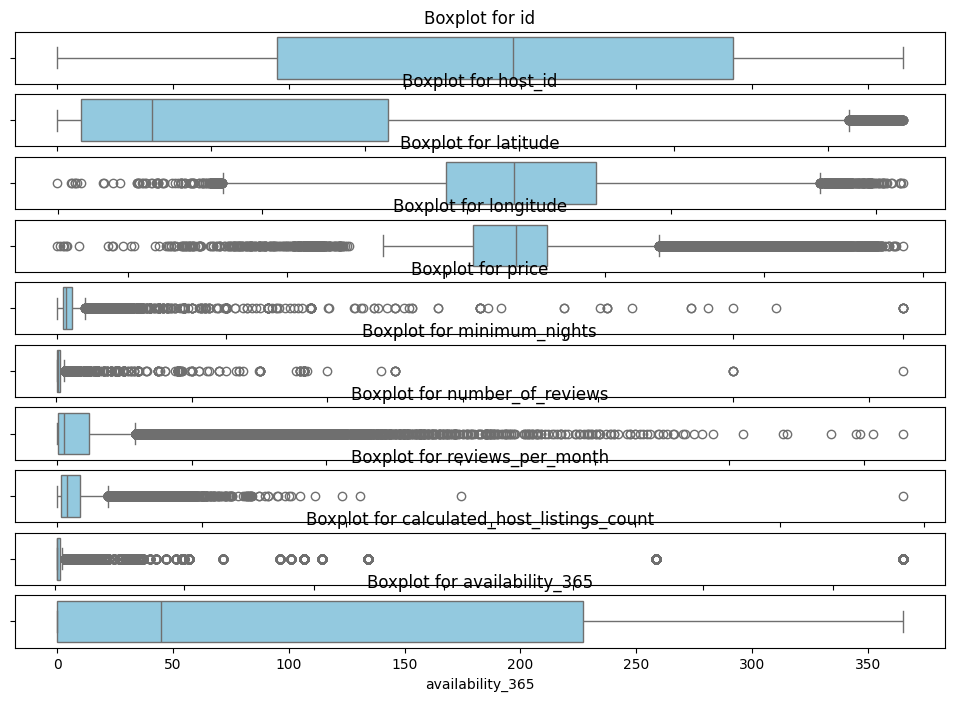

In [24]:
#3. checking for outliers and removing them 

import matplotlib.pyplot as plt
import seaborn as sns
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns

plt.figure(figsize=(12, 8))

for i, column in enumerate(numeric_columns, 1):
    plt.subplot(len(numeric_columns), 1, i)
    sns.boxplot(x=df[column], color='skyblue')
    plt.title(f'Boxplot for {column}')
    plt.xlabel(column)

plt.tight_layout()
plt.show()



C:\Users\HIMADRI CHATTERJEE\AppData\Local\Temp\ipykernel_2372\2526904006.py:24: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations.
  plt.tight_layout()


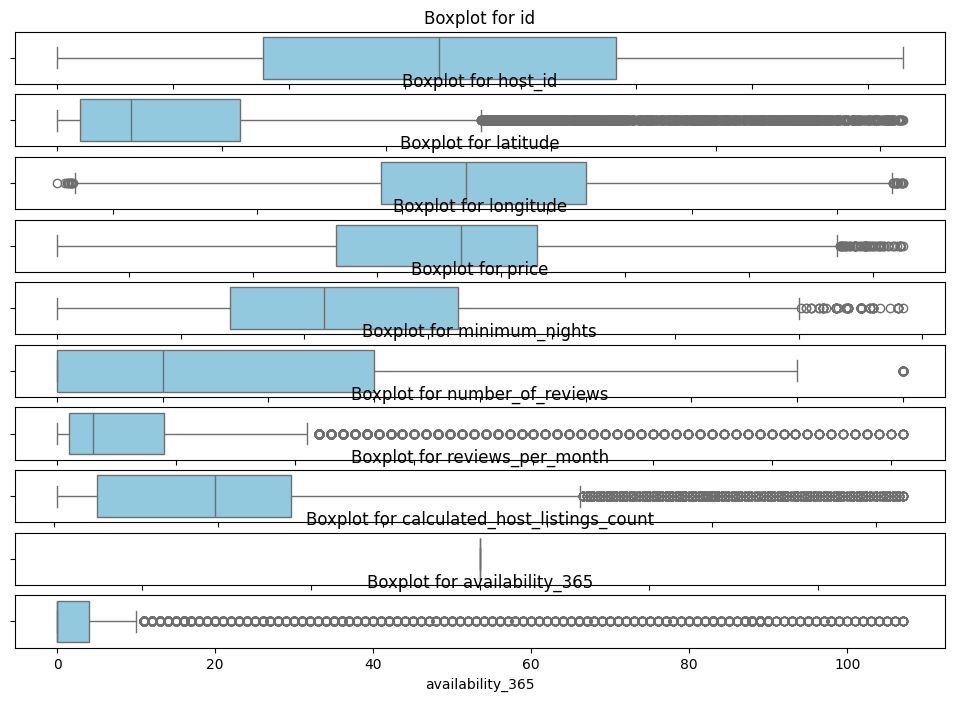

In [25]:
# Function to remove outliers using IQR
def remove_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)  # First quartile (25th percentile)
    Q3 = df[column].quantile(0.75)  # Third quartile (75th percentile)
    IQR = Q3 - Q1  # Interquartile range
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    # Filter the data to keep only values within bounds
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

# Apply outlier removal to numeric columns
for column in numeric_columns:
    df = remove_outliers_iqr(df, column)

#checking by boxplot
plt.figure(figsize=(12, 8))

for i, column in enumerate(numeric_columns, 1):
    plt.subplot(len(numeric_columns), 1, i)
    sns.boxplot(x=df[column], color='skyblue')
    plt.title(f'Boxplot for {column}')
    plt.xlabel(column)

plt.tight_layout()
plt.show()

In [26]:
# 4. Encode categorical variables
label_encoders = {}
for col in df.select_dtypes(include=['object']):
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

df

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
10,5295,1678,7702,3240,2,101,40.80316,-73.96545,0,135,5,53,1610,0.43,1,6
20,7801,15887,21207,1012,1,105,40.71842,-73.95718,0,299,3,9,2,0.07,1,0
26,8700,9990,26394,1098,2,54,40.86754,-73.92639,1,80,4,0,1611,0.72,1,0
48,13050,17026,50846,2574,1,4,40.68554,-73.94090,0,115,3,11,744,0.10,1,0
66,16458,9299,64056,4898,1,79,40.67343,-73.98338,0,225,3,4,985,0.16,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48872,36476675,10985,8636072,671,2,51,40.76236,-73.99255,0,260,3,0,1611,0.72,1,9
48874,36477588,13291,214535893,2555,2,33,40.79760,-73.93947,1,50,7,0,1611,0.72,1,22
48876,36478357,6213,177932088,2737,2,50,40.80953,-73.95410,1,60,1,0,1611,0.72,1,26
48877,36479230,14725,65767720,3802,1,13,40.70418,-73.91471,1,42,7,0,1611,0.72,1,16


In [27]:
# 5. Scale numerical features
scaler = StandardScaler()
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns
df[numerical_columns] = scaler.fit_transform(df[numerical_columns])

df

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
10,-1.742565,1678,-0.800549,3240,2,101,1.460046,-0.191312,0,0.171977,1.176149,3.754761,1610,-0.253125,0.0,-0.181271
20,-1.742309,15887,-0.800307,1012,1,105,-0.230760,0.111052,0,2.649272,0.065326,0.113759,2,-0.940090,0.0,-0.437901
26,-1.742217,9990,-0.800214,1098,2,54,2.744611,1.236782,1,-0.658824,0.620737,-0.630991,1611,0.300263,0.0,-0.437901
48,-1.741772,17026,-0.799775,2574,1,4,-0.886810,0.706274,0,-0.130133,0.065326,0.279259,744,-0.882843,0.0,-0.437901
66,-1.741424,9299,-0.799538,4898,1,79,-1.128439,-0.846860,0,1.531468,0.065326,-0.299991,985,-0.768349,0.0,-0.437901
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48872,1.988014,10985,-0.645715,671,2,51,0.645969,-1.182129,0,2.060159,0.065326,-0.630991,1611,0.300263,0.0,-0.052955
48874,1.988107,13291,3.049107,2555,2,33,1.349108,0.758557,1,-1.111987,2.286973,-0.630991,1611,0.300263,0.0,0.503078
48876,1.988186,6213,2.392260,2737,2,50,1.587146,0.223662,1,-0.960933,-1.045498,-0.630991,1611,0.300263,0.0,0.674165
48877,1.988275,14725,0.379498,3802,1,13,-0.514888,1.663821,1,-1.232831,2.286973,-0.630991,1611,0.300263,0.0,0.246447


In [28]:
#The above cleaned data is save to another csv file

df.to_csv("C:\\Internships\\Oasis Infotech\\Task_4\\AB_NYC_2019_CLEANED.csv", index = False)